In [3]:
#Scenario 1

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

In [5]:
count = 28
nobs = 94
value = .16
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

2.9229268377264077 0.0034675798365736213


In [6]:
#Scenario 2

In [15]:
Antisceptic = pd.read_csv("antiseptics.csv")
Antisceptic.head()

,Clinic,Antiseptic Type,Number of applications
0,1,A,22
1,1,B,71
2,1,C,8
3,1,D,49
4,2,A,38


In [21]:
Antisceptic_pivot = pd.pivot_table(Antisceptic,index='Antiseptic Type',columns='Clinic',values="Number of applications")

KeyError: 'AntisepticType'

In [19]:
stats.chi2_contingency(Antisceptic_pivot)

NameError: name 'Antisceptic_pivot' is not defined

In [22]:
#Scenario 3

In [23]:
Savings = pd.read_csv("savings.csv")
Savings.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


In [30]:
SavingsExpanded=pd.melt(Savings,var_name='Group',value_name='AverageAccountBalance')
SavingsExpanded.head()

,Group,AverageAccountBalance
0,Group A,21383.06
1,Group A,19729.92
2,Group A,24071.53
3,Group A,19056.28
4,Group A,19147.18


In [28]:
SavingsExpanded = SavingsExpanded.replace(Savings.columns, [0,1,2,3])

C:\Users\olver\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AverageAccountBalance', ylabel='Density'>

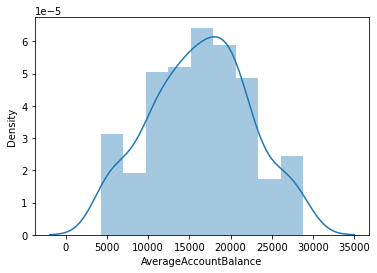

In [31]:
sns.distplot(SavingsExpanded.AverageAccountBalance)

In [35]:
scipy.stats.bartlett(SavingsExpanded['AverageAccountBalance'],SavingsExpanded['Group'])

TypeError: could not convert string to float: 'Group A'

In [34]:
SavingsExpanded.dropna(inplace=True)

In [37]:
stats.f_oneway(SavingsExpanded['AverageAccountBalance'][SavingsExpanded['Group']==0],
               SavingsExpanded['AverageAccountBalance'][SavingsExpanded['Group']==1],
               SavingsExpanded['AverageAccountBalance'][SavingsExpanded['Group']==2],
               SavingsExpanded['AverageAccountBalance'][SavingsExpanded['Group']==3])

C:\Users\olver\anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [38]:
#Scenario 4

In [ ]:
count = np.array([374,171])
nobs = np.array([129,74])
stat, pval = proportions_ztest(count,nobs)
print(stat, pval)